In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#import sys, os, django

#sys.path.append('/home/galm/software/django/tmv/BasicBrowser/')
#os.environ.setdefault("DJANGO_SETTINGS_MODULE", "BasicBrowser.settings")
#django.setup()

#from django.db.models import Q, F, Sum, Count, FloatField, Case, When, Value, Max
from sklearn.manifold import TSNE
#from scoping.models import *
import matplotlib.colors as colors
from matplotlib import cm

In [12]:
df = pd.read_csv('C:/Users/cepos/Dropbox/MCC/research_synthesis/data/geo_df.csv')
df.head()

,admin1,lat,lon,country_code3,geonameid,place_name,feature_class,feature_code,doc_id,word,country_predicted,country_conf
0,Aquitaine-Limousin-Poitou-Charentes,44.69935,1.24017,FRA,3018220,Florimont-Gaumier,P,PPL,1305496,GGME,FRA,0.731971
1,Aquitaine-Limousin-Poitou-Charentes,44.69935,1.24017,FRA,3018220,Florimont-Gaumier,P,PPL,1305496,GGME,FRA,0.731971
2,Oklahoma,35.44951,-97.39670,USA,4542765,Midwest City,P,PPL,615984,Midwest,USA,0.999811
3,NaN,39.76000,-98.50000,USA,6252001,United States,A,PCLI,615984,United States,USA,0.999811
4,West Virginia,39.23942,-80.48367,USA,4822880,Southwest District,A,ADMD,615984,Southwest,USA,0.939277


In [13]:
df.columns

Index(['admin1', 'lat', 'lon', 'country_code3', 'geonameid', 'place_name',
       'feature_class', 'feature_code', 'doc_id', 'word', 'country_predicted',
       'country_conf'],
      dtype='object')

In [10]:
predictions = [c for c in df.columns if "- prediction" in c]
for c in predictions:
    rating = c.replace(' - prediction','')
    if "0 " in rating:
        rating = "relevant"
    df.loc[df[rating]==1,c] = 1

1068


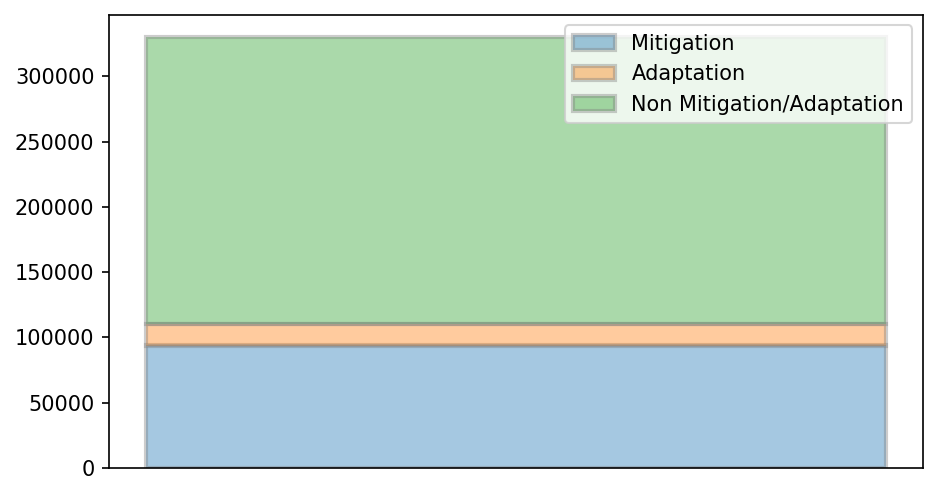

In [11]:
fig, ax = plt.subplots(dpi=150, figsize=(7,4))
df['mit/ad'] = df['1 - Mitigation - prediction'] + df['1 - Adaptation - prediction']
mitigation = df.loc[df['0 - relevance - prediction']>0.5,'1 - Mitigation - prediction'].sum()
adaptation = df.loc[df['0 - relevance - prediction']>0.5,'1 - Adaptation - prediction'].sum()
overlap = df.loc[df['mit/ad']==2,].shape[0]
nonmitad = df.loc[(df['0 - relevance - prediction']>0.5) & (df['mit/ad']==0),].shape[0]

print(overlap)

lw = 2
alpha=0.4
ec = "grey"

ax.bar(
    0,mitigation,
    alpha=alpha, label="Mitigation",
    lw=lw, edgecolor=ec
)
ax.bar(
    0,adaptation,bottom=mitigation-overlap,
    alpha=alpha, label="Adaptation",
    lw=lw, edgecolor=ec
)
ax.bar(
    0,nonmitad,bottom=mitigation-overlap+adaptation,
    alpha=alpha, label="Non Mitigation/Adaptation",
    lw=lw, edgecolor=ec
)

ax.set_xticks([])

ax.legend()
